# Analysis
### Instacart Market Basket Analysis - Paige McKenzie

See my [blog post](https://p-mckenzie.github.io/2017/12/12/instacart-part-2/ "Instacart Part 2 - Modeling") on the subject.

#### Import packages and read in data, created by feature_engineering.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('x_train.csv', index_col=0)
df.head()

,user_id,order_id,product_id,target,avg_order_size,prev_ord_size,avg_days_between_orders,num_orders_placed,reordered_usr_avg,overall_avg_prod_disp,...,usr_avg_aisle_disp,usr_avg_dept_disp,usr_avg_prod_disp,prod_due_overall_perc,prod_due_user_perc,aisle_due_overall_perc,aisle_due_user_perc,dept_due_overall_perc,dept_due_user_perc,reorder_custom
0,1,1187899,196,1,5.9,9.0,19.56,11,0.695,66.272329,...,19.00,19.00,19.00,0.909,0.909,0.695,0.909,0.909,0.695,1
1,1,1187899,10258,1,5.9,9.0,19.56,11,0.695,56.355440,...,19.44,19.00,19.44,0.818,0.909,0.695,0.818,0.909,0.695,1
2,1,431534,10326,0,5.9,9.0,19.56,11,0.695,57.078752,...,87.50,87.50,97.00,0.182,0.182,0.695,0.182,0.182,0.695,0
3,1,2550362,12427,0,5.9,9.0,19.56,11,0.695,76.984336,...,19.00,19.00,19.00,0.909,0.909,0.695,0.909,0.909,0.695,1
4,1,1187899,13032,1,5.9,9.0,19.56,11,0.695,83.045575,...,58.33,58.33,58.33,0.273,0.273,0.695,0.273,0.273,0.695,1


In [4]:
df['target'].value_counts()

0    7645837
1     828824
Name: target, dtype: int64

# Split into train/test based on user_id to simulate Kaggle train/test environment

In [6]:
import random
mylist = list(df['user_id'].unique())

random.seed(9001)
train_users = [ mylist[i] for i in (random.sample(range(len(mylist)), int(.8*len(mylist)))) ]

train = df[df['user_id'].isin(train_users)]
test = df[~df['user_id'].isin(train_users)]

del df
del train_users

y_train = np.array(train['target'])
y_test = np.array(test['target'])

X_train = np.array(train[list(train.columns[4:])])
X_test = np.array(test[list(test.columns[4:])])

var_names = test.columns[4:]

del train
del test

# Logistic Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin = LinearRegression()
lin.fit(X_train,y_train)

pred = lin.predict(X_test)

print mean_squared_error(y_test, pred)**.5

0.269768310951


In [9]:
print pred.mean(), pred.min(), pred.max()

0.0978200097736 -0.242179914377 3.1557312937


#### Separation is good!

In [10]:
import pickle

pickle.dump(lin, open('lin.pickle', 'wb'))

# Neural Network

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
hidden_layer_sizes = [(10,10),(20,20),(30,30),(40,40),(30,10),(10,30),(40,10),(10,40),(20,40),(40,20),(40,30),(30,40),(50,10),(10,50),(60,10),(60,20),(10,5),(30,5),(40,5),(50,5)]

for hidden_layer in hidden_layer_sizes:
    #define MLP
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer, activation='tanh',
                       solver='sgd', learning_rate='adaptive',
                      random_state=42, batch_size=500, learning_rate_init=.003,
                        momentum=.5, tol=.001, verbose=False,
                       early_stopping=True, validation_fraction=.2)

    #fit to training data
    mlp.fit(X_train, y_train)
    #predict on test data
    pred = mlp.predict(X_test)

    #find AUC on out-of-sample user_ids
    print('{} {} - RMSE of {} at {}\n'.format(hidden_layer[0], hidden_layer[1], mean_squared_error(y_test, pred)**.5, datetime.datetime.now().strftime('%H:%M:%S')))

10 10 - RMSE of 0.273223237843 at 18:30:42

20 20 - RMSE of 0.268352593301 at 18:40:25

30 30 - RMSE of 0.268273314707 at 18:50:16

40 40 - RMSE of 0.268010022536 at 19:10:13

30 10 - RMSE of 0.268528260256 at 19:18:34

10 30 - RMSE of 0.273200708658 at 19:27:23

40 10 - RMSE of 0.267458391176 at 19:40:36

10 40 - RMSE of 0.273462352088 at 19:48:18

20 40 - RMSE of 0.268104987841 at 20:02:26

40 20 - RMSE of 0.268226137415 at 20:12:48

40 30 - RMSE of 0.26793794889 at 20:27:06

30 40 - RMSE of 0.268119689124 at 20:38:56

50 10 - RMSE of 0.267529201923 at 20:51:00

10 50 - RMSE of 0.269416292182 at 21:00:15

60 10 - RMSE of 0.267846049183 at 21:10:09

60 20 - RMSE of 0.267441873482 at 21:26:25

10 5 - RMSE of 0.2728082582 at 21:43:00

30 5 - RMSE of 0.268245887248 at 21:47:42

40 5 - RMSE of 0.268024671953 at 21:57:39

50 5 - RMSE of 0.267624619082 at 22:07:33



In [13]:
#re-fit best model
mlp = MLPRegressor(hidden_layer_sizes=(40,10), activation='tanh',
                       solver='sgd', learning_rate='adaptive',
                      random_state=42, batch_size=500, learning_rate_init=.003,
                        momentum=.5, tol=.001, verbose=False,
                       early_stopping=True, validation_fraction=.2)

#fit to training data
mlp.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size=500, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(40, 10), learning_rate='adaptive',
       learning_rate_init=0.003, max_iter=200, momentum=0.5,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.001, validation_fraction=0.2, verbose=False,
       warm_start=False)

In [15]:
pred = mlp.predict(X_test)

print mean_squared_error(y_test, pred)**.5

0.267458391176


In [16]:
import pickle

pickle.dump(mlp, open('mlp.pickle', 'wb'))

# XGBoost

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [18]:
#split initial X_train into a train and validation set, adding another layer to prevent overfitting the train set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
%%time
depths = [5,10,15]
n_estimators = [40,140,240,340]
learning_rates = [.05,.1,.2]

for learning_rate in learning_rates:
    for n_tree in n_estimators:
        for depth in depths:
            gbm = xgb.XGBRegressor(objective='reg:linear',
                            max_depth=depth,
                            learning_rate=learning_rate,
                            n_estimators=n_tree,
                            subsample=.8,
                            colsample_bytree=.8)

            gbm.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='rmse',
                early_stopping_rounds=2, verbose=False)
            
            print '{}\t{}\t{}\tRMSE {} at {}'.format(learning_rate, n_tree, depth, mean_squared_error(y_test, gbm.predict(X_test))**.5, datetime.datetime.now().strftime('%H:%M:%S'))

0.05	40	5	RMSE 0.272747515999 at 23:08:25
0.05	40	10	RMSE 0.270945475055 at 23:15:11
0.05	40	15	RMSE 0.271032317978 at 23:28:33
0.05	140	5	RMSE 0.265477977278 at 23:39:15
0.05	140	10	RMSE 0.264535903207 at 00:01:47
0.05	140	15	RMSE 0.265742236989 at 00:42:36
0.05	240	5	RMSE 0.265084156629 at 01:01:02
0.05	240	10	RMSE 0.264508323906 at 01:36:44
0.05	240	15	RMSE 0.265742236989 at 02:17:35
0.05	340	5	RMSE 0.264891058298 at 02:43:37
0.05	340	10	RMSE 0.264508323906 at 03:19:26
0.05	340	15	RMSE 0.265742236989 at 04:00:13
0.1	40	5	RMSE 0.26613617829 at 04:03:32
0.1	40	10	RMSE 0.264920636652 at 04:10:17
0.1	40	15	RMSE 0.266208122418 at 04:23:17
0.1	140	5	RMSE 0.265052262829 at 04:34:09
0.1	140	10	RMSE 0.264704483794 at 04:54:12
0.1	140	15	RMSE 0.266417480872 at 05:11:55
0.1	240	5	RMSE 0.264751236086 at 05:30:25
0.1	240	10	RMSE 0.264704483794 at 05:50:28
0.1	240	15	RMSE 0.266417480872 at 06:08:03
0.1	340	5	RMSE 0.264689307922 at 06:29:37
0.1	340	10	RMSE 0.264704483794 at 06:49:41
0.1	340	15	RMS

In [20]:
#re-fit model with best parameters

gbm = xgb.XGBRegressor(objective='reg:linear',
                max_depth=10,
                learning_rate=.05,
                n_estimators=240,
                subsample=.8,
                colsample_bytree=.8)

gbm.fit(X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    early_stopping_rounds=2, verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=240, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [22]:
pred = gbm.predict(X_test)

print mean_squared_error(y_test, pred)**.5

0.264508323906


In [23]:
import pickle

pickle.dump(gbm, open('xgb.pickle', 'wb'))

# LightGBM

In [24]:
import lightgbm as lgb

In [25]:
%%time
leaves = [20,40,80]
n_estimators = [40,140,240,340]
learning_rates = [.1,.2]

#uses same x_train/x_val split as XGBoost
for learning_rate in learning_rates:
    for n_tree in n_estimators:
        for leaf in leaves:
            gbm = lgb.LGBMRegressor(objective='regression',
                            num_leaves=leaf,
                            learning_rate=learning_rate,
                            n_estimators=n_tree,
                            feature_fraction=.8)

            gbm.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='rmse',
                early_stopping_rounds=2, verbose=False)

            print '{}\t{}\t{}\tRMSE {} at {}'.format(learning_rate, n_tree, leaf, mean_squared_error(y_test, gbm.predict(X_test, num_iteration=gbm.best_iteration_))**.5, datetime.datetime.now().strftime('%H:%M:%S'))

0.1	40	20	RMSE 0.266010642666 at 22:19:02
0.1	40	40	RMSE 0.265481199588 at 22:19:41
0.1	40	80	RMSE 0.265193885772 at 22:20:29
0.1	140	20	RMSE 0.264974642854 at 22:21:47
0.1	140	40	RMSE 0.264730080751 at 22:23:19
0.1	140	80	RMSE 0.264635792783 at 22:25:03
0.1	240	20	RMSE 0.264766323743 at 22:26:57
0.1	240	40	RMSE 0.264612124258 at 22:29:08
0.1	240	80	RMSE 0.264605122858 at 22:31:31
0.1	340	20	RMSE 0.264647121968 at 22:34:03
0.1	340	40	RMSE 0.264598483202 at 22:36:22
0.1	340	80	RMSE 0.264606056962 at 22:38:49
0.2	40	20	RMSE 0.265384372015 at 22:39:20
0.2	40	40	RMSE 0.265092001702 at 22:39:56
0.2	40	80	RMSE 0.264933189449 at 22:40:37
0.2	140	20	RMSE 0.264837341975 at 22:41:46
0.2	140	40	RMSE 0.264828760353 at 22:42:50
0.2	140	80	RMSE 0.264864249404 at 22:43:40
0.2	240	20	RMSE 0.264732720685 at 22:45:16
0.2	240	40	RMSE 0.264828760353 at 22:46:14
0.2	240	80	RMSE 0.264864249404 at 22:47:08
0.2	340	20	RMSE 0.264732720685 at 22:49:00
0.2	340	40	RMSE 0.264828760353 at 22:50:12
0.2	340	80	RMSE 0

In [26]:
#re-fit model with best parameters

gbm = lgb.LGBMRegressor(objective='regression',
                num_leaves=40,
                learning_rate=.1,
                n_estimators=340,
                feature_fraction=.8)

gbm.fit(X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    early_stopping_rounds=2, verbose=False)

LGBMRegressor(boosting_type='gbdt',
       colsample_bytree=1.0, feature_fraction=0.8, learning_rate=0.1,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0.0, n_estimators=340, n_jobs=-1, num_leaves=40,
       objective='regression', random_state=0, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0, subsample_for_bin=50000,
       subsample_freq=1)

In [28]:
pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print mean_squared_error(y_test, pred)**.5

0.264598483202


In [29]:
import pickle

pickle.dump(gbm, open('lgb.pickle', 'wb'))

# Model Comparisons

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Same train/test split as during model training

In [31]:
import random
df = pd.read_csv('x_train.csv', index_col=0)

mylist = list(df['user_id'].unique())

random.seed(9001)
train_users = [ mylist[i] for i in (random.sample(range(len(mylist)), int(.8*len(mylist)))) ]

test = df[~df['user_id'].isin(train_users)]

del df
del train_users

X_test = np.array(test[list(test.columns[4:])])

var_names = test.columns[4:]

In [32]:
import pickle

lin = pickle.load(open('lin.pickle', 'rb'))
mlp = pickle.load(open('mlp.pickle', 'rb'))
xgb = pickle.load(open('xgb.pickle', 'rb'))
lgb = pickle.load(open('lgb.pickle', 'rb'))

In [33]:
test = test[['user_id', 'product_id', 'target', 'avg_order_size', 'prev_ord_size']]

test['lin_pred'] = lin.predict(X_test)
test['mlp_pred'] = mlp.predict(X_test)
test['xgb_pred'] = xgb.predict(X_test)
test['lgb_pred'] = lgb.predict(X_test)

test.head()

,user_id,product_id,target,avg_order_size,prev_ord_size,lin_pred,mlp_pred,xgb_pred,lgb_pred
0,1,196,1,5.9,9.0,0.928517,0.755392,0.935406,0.943262
1,1,10258,1,5.9,9.0,0.851050,0.744850,0.862433,0.861641
2,1,10326,0,5.9,9.0,0.134407,0.057902,0.070194,0.078846
3,1,12427,0,5.9,9.0,0.908589,0.755285,0.873678,0.876320
4,1,13032,1,5.9,9.0,0.292921,0.254694,0.251282,0.263266


### Wave assumptions around, and label

In [35]:
def label_top_n(group):
    for string in ['lin', 'mlp', 'xgb', 'lgb']:
        group[string] = 0
        group.loc[group[string+'_pred'].isin(group[string+'_pred'].nlargest(int(max(group['prev_ord_size'])))), string] = 1
    
    return group

labeled = test.groupby('user_id').apply(label_top_n)
labeled.head()

,user_id,product_id,target,avg_order_size,prev_ord_size,lin_pred,mlp_pred,xgb_pred,lgb_pred,lin,mlp,xgb,lgb
0,1,196,1,5.9,9.0,0.928517,0.755392,0.935406,0.943262,1,1,1,1
1,1,10258,1,5.9,9.0,0.851050,0.744850,0.862433,0.861641,1,1,1,1
2,1,10326,0,5.9,9.0,0.134407,0.057902,0.070194,0.078846,0,0,0,0
3,1,12427,0,5.9,9.0,0.908589,0.755285,0.873678,0.876320,1,1,1,1
4,1,13032,1,5.9,9.0,0.292921,0.254694,0.251282,0.263266,1,1,0,0


In [37]:
labeled.to_csv('labeled.csv')

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

x_lin, y_lin, t_lin = roc_curve(labeled['target'].values, labeled['lin'].values, pos_label=1)
x_mlp, y_mlp, t_mlp = roc_curve(labeled['target'].values, labeled['mlp'].values, pos_label=1)
x_xgb, y_xgb, t_xgb = roc_curve(labeled['target'].values, labeled['xgb'].values, pos_label=1)
x_lgb, y_lgb, t_lgb = roc_curve(labeled['target'].values, labeled['lgb'].values, pos_label=1)

print [list(x_lin), list(x_mlp), list(x_xgb), list(x_lgb)]
print [list(y_lin), list(y_mlp), list(y_xgb), list(y_lgb)]

print [roc_auc_score(labeled['target'].values, labeled['lin'].values), roc_auc_score(labeled['target'].values, labeled['mlp'].values), roc_auc_score(labeled['target'].values, labeled['xgb'].values), roc_auc_score(labeled['target'].values, labeled['lgb'].values)]

[[0.0, 0.12180512303471928, 1.0], [0.0, 0.12087068212880135, 1.0], [0.0, 0.11926430572869086, 1.0], [0.0, 0.11934005355893998, 1.0]]
[[0.0, 0.5151662875094789, 1.0], [0.0, 0.52377857220236157, 1.0], [0.0, 0.53865597804499332, 1.0], [0.0, 0.5379638657181719, 1.0]]
[0.69668058223737983, 0.70145394503678016, 0.70969583615815124, 0.70931190607961603]


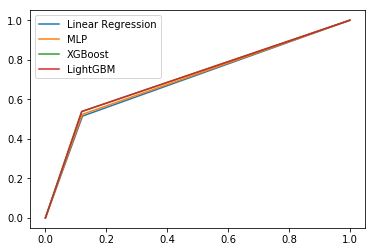

In [39]:
names  = ['Linear Regression', 'MLP', 'XGBoost', 'LightGBM']

plt.plot(x_lin, y_lin)
plt.plot(x_mlp, y_mlp)
plt.plot(x_xgb, y_xgb)
plt.plot(x_lgb, y_lgb)

plt.legend(names)
plt.show()

### XGBoost is the best out-of-sample, followed by LightGBM, MLP, and then Linear

[13753, 11916, 11483, 9056, 14336, 12422, 9280, 8025, 5562, 6987, 10107, 7595, 7325, 7281, 9243, 4867, 7680, 2124, 3632, 3294, 6580, 7206, 1412, 1150, 1739, 2442, 381, 236, 611, 119]
['avg_order_size', 'prev_ord_size', 'avg_days_between_orders', 'num_orders_placed', 'reordered_usr_avg', 'overall_avg_prod_disp', 'overall_avg_aisle_disp', 'perc_aisle_support', 'overall_avg_dept_disp', 'perc_dept_support', 'avg_ord_pos', 'days_since_aisle', 'days_since_department', 'days_since_prod', 'order_aisle_displacement', 'orders_since_prod', 'perc_prod_support', 'prod_aisle_ratio', 'prod_dept_ratio', 'streak_length', 'usr_avg_aisle_disp', 'usr_avg_dept_disp', 'usr_avg_prod_disp', 'prod_due_overall_perc', 'prod_due_user_perc', 'aisle_due_overall_perc', 'aisle_due_user_perc', 'dept_due_overall_perc', 'dept_due_user_perc', 'reorder_custom']


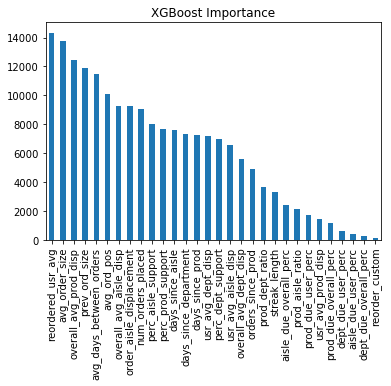

In [40]:
#XGBoost variable importance
mini_dict = xgb.booster().get_fscore()
xgb_importance = [mini_dict['f'+str(i)] for i in range(len(var_names))]
del mini_dict

print xgb_importance
print list(var_names.values)
pd.Series(xgb_importance, index=var_names.values).sort_values(ascending=False).plot(kind='bar', title='XGBoost Importance')

[801, 581, 644, 459, 942, 644, 425, 281, 296, 262, 349, 453, 408, 551, 574, 341, 619, 139, 228, 272, 234, 296, 119, 45, 46, 120, 1, 14, 30, 5]
['avg_order_size', 'prev_ord_size', 'avg_days_between_orders', 'num_orders_placed', 'reordered_usr_avg', 'overall_avg_prod_disp', 'overall_avg_aisle_disp', 'perc_aisle_support', 'overall_avg_dept_disp', 'perc_dept_support', 'avg_ord_pos', 'days_since_aisle', 'days_since_department', 'days_since_prod', 'order_aisle_displacement', 'orders_since_prod', 'perc_prod_support', 'prod_aisle_ratio', 'prod_dept_ratio', 'streak_length', 'usr_avg_aisle_disp', 'usr_avg_dept_disp', 'usr_avg_prod_disp', 'prod_due_overall_perc', 'prod_due_user_perc', 'aisle_due_overall_perc', 'aisle_due_user_perc', 'dept_due_overall_perc', 'dept_due_user_perc', 'reorder_custom']


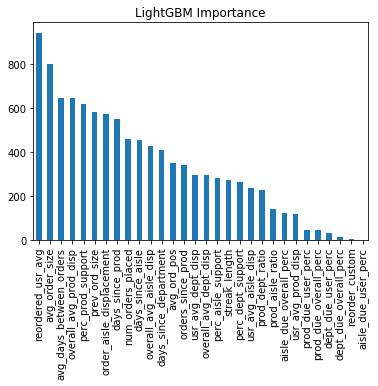

In [42]:
#lightgbm variable importance
print list(lgb.feature_importances_)
print list(var_names.values)
pd.Series(lgb.feature_importances_, index=var_names.values).sort_values(ascending=False).plot(kind='bar', title='LightGBM Importance')

# Make Predictions

In [44]:
df = pd.read_csv('x_test.csv', index_col=0)
df.head()

,user_id,order_id,product_id,target,avg_order_size,prev_ord_size,avg_days_between_orders,num_orders_placed,reordered_usr_avg,overall_avg_prod_disp,...,usr_avg_aisle_disp,usr_avg_dept_disp,usr_avg_prod_disp,prod_due_overall_perc,prod_due_user_perc,aisle_due_overall_perc,aisle_due_user_perc,dept_due_overall_perc,dept_due_user_perc,reorder_custom
120,3,2774568,248,2,7.33,6.0,12.09,13,0.625,109.905904,...,45.0,20.57,135.00,0.231,0.538,0.625,0.231,0.538,0.625,0
121,3,2774568,1005,2,7.33,6.0,12.09,13,0.625,108.401544,...,37.0,45.00,37.00,0.077,0.231,0.625,0.077,0.231,0.625,0
122,3,2774568,1819,2,7.33,6.0,12.09,13,0.625,87.987620,...,23.5,23.50,31.33,0.308,0.308,0.625,0.308,0.308,0.625,0
123,3,2774568,7503,2,7.33,6.0,12.09,13,0.625,96.378691,...,45.0,20.57,114.00,0.231,0.538,0.625,0.231,0.538,0.625,0
124,3,2774568,8021,2,7.33,6.0,12.09,13,0.625,83.698469,...,135.0,135.00,135.00,0.077,0.077,0.625,0.077,0.077,0.625,0


In [46]:
X = df.as_matrix(columns=df.columns[4:])

In [47]:
import pickle

lin = pickle.load(open('lin.pickle', 'rb'))
mlp = pickle.load(open('mlp.pickle', 'rb'))
xgb = pickle.load(open('xgb.pickle', 'rb'))
lgb = pickle.load(open('lgb.pickle', 'rb'))

In [48]:
df = df[['order_id', 'product_id', 'avg_order_size', 'prev_ord_size']]

df['lin_pred'] = lin.predict(X)
df['mlp_pred'] = mlp.predict(X)
df['xgb_pred'] = xgb.predict(X)
df['lgb_pred'] = lgb.predict(X)

df.head()

,order_id,product_id,avg_order_size,prev_ord_size,lin_pred,mlp_pred,xgb_pred,lgb_pred
120,2774568,248,7.33,6.0,0.050550,0.016151,0.025804,0.021675
121,2774568,1005,7.33,6.0,0.047679,0.059232,0.059705,0.047683
122,2774568,1819,7.33,6.0,0.149938,0.091240,0.093405,0.118161
123,2774568,7503,7.33,6.0,0.053472,0.018645,0.032246,0.031531
124,2774568,8021,7.33,6.0,0.065819,0.022175,0.033633,0.028103


In [50]:
def join_prod_ids_prev(group):
    #selects the top n product_ids (using prev_ord_size), joins as a string
    size = int(round(max(group['prev_ord_size']), 0))
    subset = group.sort_values('pred', ascending=False).iloc[:size,].sort_values('product_id', ascending=True)
    return ' '.join(subset['product_id'].astype(str))

def join_prod_ids_avg(group):
    #selects the top n product_ids (using avg_order_size, rounded), joins as a string
    size = int(round(max(group['avg_order_size']), 0))
    subset = group.sort_values('pred', ascending=False).iloc[:size,].sort_values('product_id', ascending=True)
    return ' '.join(subset['product_id'].astype(str))

In [51]:
#apply prev
for col in ['lin', 'mlp', 'xgb', 'lgb']:
    print col
    df.rename(columns={col+'_pred':'pred'}).groupby('order_id').apply(join_prod_ids_prev).rename('products').to_csv(col+'_prev.csv', header=True, index=True)

lin
mlp
xgb
lgb


In [52]:
#apply avg
for col in ['lin', 'mlp', 'xgb', 'lgb']:
    print col
    df.rename(columns={col+'_pred':'pred'}).groupby('order_id').apply(join_prod_ids_avg).rename('products').to_csv(col+'_avg.csv', header=True, index=True)

lin
mlp
xgb
lgb


# Results
(After submitting to Kaggle)

|Model|Assumption|Kaggle score|
|:----:|:----:|:----:|
|Linear|Previous|0.3528851|
|Linear|Average|0.3602763|
|MLP|Previous|0.3590081|
|MLP|Average|0.3655024|
|XGB|Previous|0.3680951|
|XGB|Average|0.3752033|
|LGB|Previous|0.3671077|
|LGB|Average|0.3746257|